In [32]:
"""
Graph Mining - ALTEGRAD - Oct 2023
"""
import networkx as nx
import numpy as np
from scipy.sparse.linalg import eigs
from scipy.sparse import diags, eye
from random import randint
from sklearn.cluster import KMeans
import collections
import matplotlib.pyplot as plt

## Task 1 : 
Load the network data into an undirected graph G, using the read edgelist() function of NetworkX. Note that, the delimeter used to separate values is the tab character \t and addition- aly, that lines that start with the # character are comments. Furthermore, compute and print the following network characteristics: (1) number of nodes, (2) number of edges.

number of nodes : 9877
number of edges : 25998


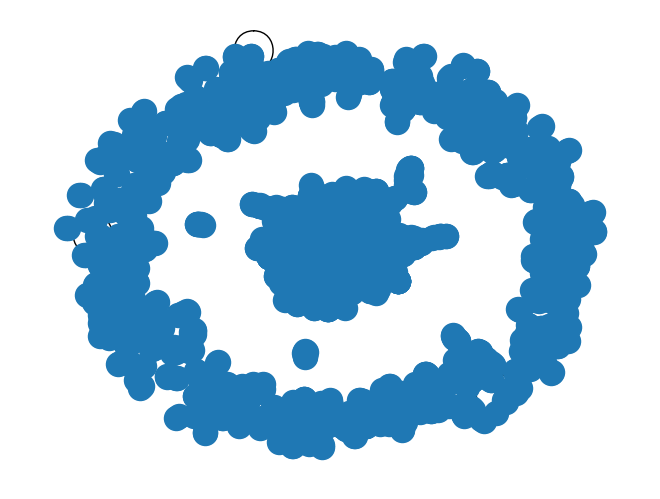

In [34]:

############## Task 1 : Load Graph and Simple Statistics
G = nx.read_edgelist("/Users/merrheimmaissane/Downloads/lab2_graph_mining-2/code/datasets/CA-HepTh.txt",comments='#',delimiter='\t')
number_of_nodes = G.number_of_nodes()
number_of_edges = G.number_of_edges()

print(f"number of nodes : {number_of_nodes}")
print(f"number of edges : {number_of_edges}")
nx.draw(G)


## Task 2 : 
Print the number of connected components. If the graph is not connected, retrieve the largest connected component subgraph (also known as giant connected component) (Hint: you can use the connected components() function of NetworkX). Find the number of nodes and edges of the largest connected component and examine to what fraction of the whole graph they cor- respond.

In [35]:
############## Task 2 : Connected Components
#print the number of connected components
number_of_connected_components = nx.number_connected_components(G)
print(f"number of connected components : {number_of_connected_components}")

# Note 
# -> largest connected component= Lcc
# -> largest connected component subgraph = Lccs
# -> largest connected component subgraph nodes = Lccs_nodes
# -> largest connected component subgraph edges = Lccs_edges

#if the graph is not connectecd, retrieve the largest connected component subgraph
if nx.is_connected(G)!=True : 
    connected_components = list(nx.connected_components(G))
    Lcc = max(connected_components, key=len)
    Lccs = G.subgraph(Lcc)
    Lccs_nodes = Lccs.number_of_nodes()
    Lccs_edges = Lccs.number_of_edges()
    print(f"number of nodes for the largest subgraph : {Lccs_nodes}")
    print(f"number of edges for the largest subgraph : {Lccs_edges}")
    print(f"fraction of the graph (number of nodes) : {(Lccs_nodes/number_of_nodes)*100} % ")
    print(f"fraction of the graph (number of edges) : {(Lccs_edges/number_of_edges)*100} % ")

number of connected components : 429
number of nodes for the largest subgraph : 8638
number of edges for the largest subgraph : 24827
fraction of the graph (number of nodes) : 87.45570517363572 % 
fraction of the graph (number of edges) : 95.49580736979767 % 


## Task 3 :
Find and print the minimum, maximum, median and mean degree of the nodes of the graph (Hint:youcanusethebuilt-infunctionsmin(), max(), mean()oftheNumPylibrary).

In [37]:
############## Task 3
# Degree
degree_sequence = [G.degree(node) for node in G.nodes()]
# Find and print the minimum, maximum , median and mean degree of the nodes of the graph 
minimum_degree_sequence = np.min(degree_sequence)
maximum_degree_sequence = np.max(degree_sequence)
mean_degree_sequence = np.mean(degree_sequence)
median_degree_sequence = np.median(degree_sequence)

print(f"minimum degree of the nodes of the graph : {minimum_degree_sequence}")
print(f"maximum degree of the nodes of the graph : {maximum_degree_sequence}")
print(f"mean degree of the nodes of the graph : {mean_degree_sequence}")
print(f"median degree of the nodes of the graph : {median_degree_sequence}")

minimum degree of the nodes of the graph : 1
maximum degree of the nodes of the graph : 65
mean degree of the nodes of the graph : 5.264351523742027
median degree of the nodes of the graph : 3.0


## Task 4:
Plot the degree histogram using the matplotlib library of Python (Hint: use the degree histogram() function that returns a list of the frequency of each degree value). Pro- duce again the plot using log-log axis.

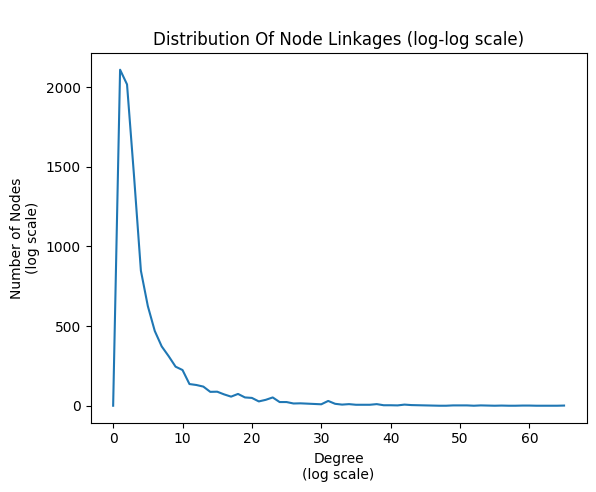

In [39]:
############## Task 4 : Plot the degree histogram 

# normal axis :
degree_frequencies_y = nx.degree_histogram(G)
aux_x = np.arange(0,len(degree_frequencies_y)).tolist()
plt.title('\nDistribution Of Node Linkages (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.plot(aux_x, degree_frequencies_y, '-')

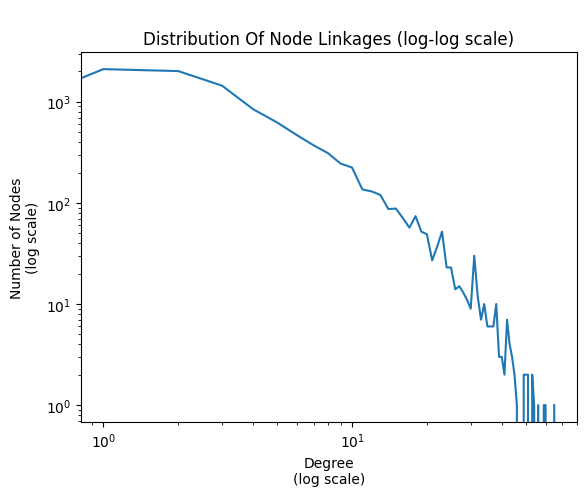

In [40]:

# log-log axis : 
degree_frequencies_y = nx.degree_histogram(G)
aux_x = np.arange(0,len(degree_frequencies_y)).tolist()
plt.title('\nDistribution Of Node Linkages (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")
plt.plot(aux_x, degree_frequencies_y, '-')

## Task 5 :
Calculate the global clustering coefficent of the HepTh graph. (Hint: Use the transitivity function implemented in NetworkX.)

In [41]:
############## Task 5 : Compute the global clustering coefficient of the HepTH graph
clustering_coeff = nx.transitivity(G)
print(f" the global clustering coefficient is : {clustering_coeff} ")

 the global clustering coefficient is : 0.2839996525875546 


## Task 6 :
Fill in the body of the spectral clustering() function which implements the Spectral Clus- tering algorithm. The algorithm must return a dictionary keyed by node to the cluster to which the node belongs (Hint: to perform k-means, you can use scikit-learn’s implementation of the algorithm).

In [69]:
############## Task 6 : method with scpicy.sparse
# Perform spectral clustering to partition graph G into k clusters
def spectral_clustering(G, k):


    # 1. A : adjacency matrix of the graph
    A = nx.adjacency_matrix(G)

   # 2. Compute the Laplacian matrix L 
    I = eye(A.shape[0])
    degrees = dict(G.degree())
    nodes = list(G.nodes())
    diagonal_values = np.array( [degrees [node] for node in nodes])
    D_inverse = diags (1.0/diagonal_values)
    L = I - D_inverse@A

    # 3. Compute the eigenvalues of the Laplacian matrix 
    eigenvalues, eigenvectors = eigs(L,k,which='SR')
    eigenvectors = eigenvectors.real
   
    #K-means on rows of U
    kmeans = KMeans(n_clusters=k, random_state=0).fit(eigenvectors)
    labels = kmeans.labels_
    clustering = dict(zip(G.nodes(),labels))

    return clustering

## Task 7 : 
Apply the Spectral Clustering algorithm to the giant connected component of the CA-HepTh dataset, trying to identify 50 clusters.

In [89]:

############## Task 7 : Apply the Spectral Clustering Algorithm to the giant connected component
clustering = spectral_clustering(Lccs, k=50)

/Users/merrheimmaissane/opt/anaconda3/envs/env_exercice/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [90]:
for cluster in range(50):
    count = 0
    for key, value in clustering.items():
        if value == cluster:
            count += 1
    print(f"Le nombre d'éléments avec la valeur {cluster} est : {count}")

Le nombre d'éléments avec la valeur 0 est : 27
Le nombre d'éléments avec la valeur 1 est : 7763
Le nombre d'éléments avec la valeur 2 est : 6
Le nombre d'éléments avec la valeur 3 est : 17
Le nombre d'éléments avec la valeur 4 est : 6
Le nombre d'éléments avec la valeur 5 est : 28
Le nombre d'éléments avec la valeur 6 est : 19
Le nombre d'éléments avec la valeur 7 est : 6
Le nombre d'éléments avec la valeur 8 est : 10
Le nombre d'éléments avec la valeur 9 est : 5
Le nombre d'éléments avec la valeur 10 est : 8
Le nombre d'éléments avec la valeur 11 est : 60
Le nombre d'éléments avec la valeur 12 est : 15
Le nombre d'éléments avec la valeur 13 est : 7
Le nombre d'éléments avec la valeur 14 est : 9
Le nombre d'éléments avec la valeur 15 est : 9
Le nombre d'éléments avec la valeur 16 est : 8
Le nombre d'éléments avec la valeur 17 est : 11
Le nombre d'éléments avec la valeur 18 est : 9
Le nombre d'éléments avec la valeur 19 est : 13
Le nombre d'éléments avec la valeur 20 est : 8
Le nombre d

## Task 8 : 
Fill in the body of the modularity() function that computes the modularity of a clustering result.

In [105]:
############## Task 8
# Compute modularity value from graph G based on clustering
def modularity(G, clustering):

    # number of edges of G
    m = G.number_of_edges()

    #number of clusters
    n_c=len(set(clustering.values()))

    modularity = 0
    for i in range(n_c):
        # We create a list that contains the nodes of the cluster i
        nodes_cluster_i = [n for n, v in clustering.items() if v == i] 
        # We create a community subgraph out of the nodes of the cluster i 
        community = G.subgraph(nodes_cluster_i)
        l_c = community.number_of_edges()
        d_c = np.sum([G.degree(node) for node in community.nodes()])
        modularity += ( l_c / m ) - ( ( d_c / (2*m) ) **2 )
    return modularity

## Task 9 : 
Compute the modularity of the following two clustering results: (i) the one obtained by the Spectral Clustering algorithm using k = 50, and (ii) the one obtained if we randomly partition the nodes into 50 clusters (Hint: to assign each node to a cluster, use the randint(a,b) func- tion which returns a random integer n such that a ≤ n ≤ b).

In [106]:
############## Task 9
print(modularity(G,clustering))

0.2164095602494492


In [141]:
from random import randint
def random_clustering(G,k):
    clustering = {}
    nodes = list(G.nodes())
    for node in nodes : 
        clustering[node] = randint(0,50)
    return clustering

In [142]:
clustering_random = random_clustering(G,50)
print(modularity(G,clustering_random))

0.002112933782043784


## Task 10 : 
Fill in the body of the create dataset() function to generate the dataset as described above

The dataset will contain two types of graphs: (1) cycle graphs, and (2) path graphs. A cycle graph Cn is a graph on n nodes containing a single cycle through all nodes, while a path graph Pn is a tree with two nodes of degree 1, and all the remaining n − 2 nodes of degree 2. Each graph is assigned a class label: label 0 if it is a cycle or label 1 if it is a path. Figure 2 illustrates such a dataset consisting of three cycle graphs and three path graphs. Use the cycle graph() and path graph() functions of NetworkX to generate 100 cycle graphs and 100 path graphs of size n = 3, . . . , 102, respectively. Store the 200 graphs in a list and their class labels in another list.

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


############## Task 10
# Generate simple dataset
def create_dataset():
    # Gs list where all the graphs are stored
    # y list where the class labels are stored
    Gs = list()
    y = list()

    for i in range (3,103):
        Gs.append(nx.cycle_graph(i))
        y.append(0)

        Gs.append(nx.path_graph(i))
        y.append(1)
    return Gs, y

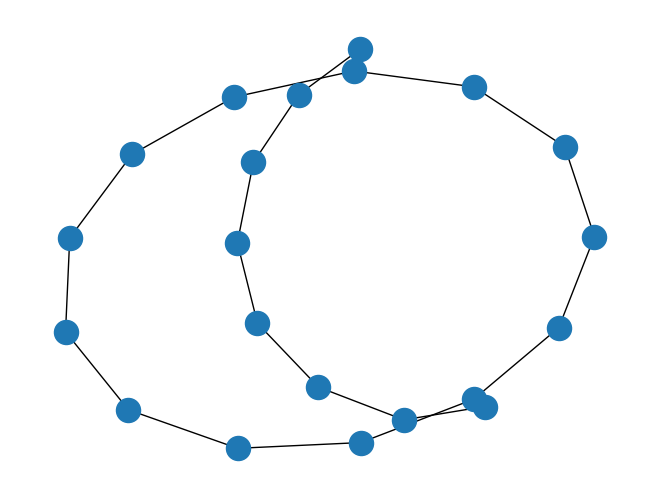

In [108]:
Gs, y = create_dataset()
G_train, G_test, y_train, y_test = train_test_split(Gs, y, test_size=0.1)
nx.draw(Gs[20])
nx.draw(Gs[11])

In [109]:
# Compute the shortest path kernel
def shortest_path_kernel(Gs_train, Gs_test):    
    all_paths = dict()
    sp_counts_train = dict()
    
    for i,G in enumerate(Gs_train):
        sp_lengths = dict(nx.shortest_path_length(G))
        sp_counts_train[i] = dict()
        nodes = G.nodes()
        for v1 in nodes:
            for v2 in nodes:
                if v2 in sp_lengths[v1]:
                    length = sp_lengths[v1][v2]
                    if length in sp_counts_train[i]:
                        sp_counts_train[i][length] += 1
                    else:
                        sp_counts_train[i][length] = 1

                    if length not in all_paths:
                        all_paths[length] = len(all_paths)
                        
    sp_counts_test = dict()

    for i,G in enumerate(Gs_test):
        sp_lengths = dict(nx.shortest_path_length(G))
        sp_counts_test[i] = dict()
        nodes = G.nodes()
        for v1 in nodes:
            for v2 in nodes:
                if v2 in sp_lengths[v1]:
                    length = sp_lengths[v1][v2]
                    if length in sp_counts_test[i]:
                        sp_counts_test[i][length] += 1
                    else:
                        sp_counts_test[i][length] = 1

                    if length not in all_paths:
                        all_paths[length] = len(all_paths)

    phi_train = np.zeros((len(Gs_train), len(all_paths)))
    for i in range(len(Gs_train)):
        for length in sp_counts_train[i]:
            phi_train[i,all_paths[length]] = sp_counts_train[i][length]
    
  
    phi_test = np.zeros((len(Gs_test), len(all_paths)))
    for i in range(len(Gs_test)):
        for length in sp_counts_test[i]:
            phi_test[i,all_paths[length]] = sp_counts_test[i][length]

    K_train = np.dot(phi_train, phi_train.T)
    K_test = np.dot(phi_test, phi_train.T)

    return K_train, K_test

## Task 11 : 
Fill in the body of the graphlet kernel() function. The function generates the feature maps of equation 1 by sampling n samples size-3 graphlets from each graph. Then, it generates the Ktrain and Ktest matrices by computing the inner products between the feature maps (Hint: you can use the random.choice() function of NumPy to sample 3 nodes from the set of nodes of a graph. Given a set of nodes s, use the G.subgraph(s) function of NetworkX to obtain the subgraph induced by set s. To test if a subgraph is isomorphic to a graphlet, use the is isomorphic() function of NetworkX).

In [127]:

############## Task 11
# Compute the graphlet kernel
def graphlet_kernel(Gs_train, Gs_test, n_samples=200):
    graphlets = [nx.Graph(), nx.Graph(), nx.Graph(), nx.Graph()]
    
    graphlets[0].add_nodes_from(range(3))

    graphlets[1].add_nodes_from(range(3))
    graphlets[1].add_edge(0,1)

    graphlets[2].add_nodes_from(range(3))
    graphlets[2].add_edge(0,1)
    graphlets[2].add_edge(1,2)

    graphlets[3].add_nodes_from(range(3))
    graphlets[3].add_edge(0,1)
    graphlets[3].add_edge(1,2)
    graphlets[3].add_edge(0,2)

    
    phi_train = np.zeros((len(G_train), 4))

    for index_graph in range(len(Gs_train)): 
        for sample in range(n_samples) : 
            nodes = np.random.choice(Gs_train[index_graph].nodes(),3)
            subgraph = Gs_train[index_graph].subgraph(nodes)
            for index_graphlet in range(len(graphlets)) :
                if nx.is_isomorphic(subgraph,graphlets[index_graphlet]) == True : 
                    phi_train[index_graph][index_graphlet] = 1


    phi_test = np.zeros((len(G_test), 4))
    
    for index_graph in range(len(Gs_test)): 
        for sample in range(n_samples) : 
            nodes = np.random.choice(Gs_test[index_graph].nodes(),3)
            subgraph = Gs_test[index_graph].subgraph(nodes)
            for index_graphlet in range(len(graphlets)) :
                if nx.is_isomorphic(subgraph,graphlets[index_graphlet]) == True : 
                    phi_test[index_graph][index_graphlet] = 1


    K_train = np.dot(phi_train, phi_train.T)
    K_test = np.dot(phi_test, phi_train.T)

    return K_train, K_test


K_train_sp, K_test_sp = shortest_path_kernel(G_train, G_test)

## Task 12 : 
Use the graphlet kernel() function that you implemented to compute the kernel matrices associated with the graphlet kernel.

In [135]:
############## Task 12
K_train_graphlet, K_test_graphlet = graphlet_kernel(G_train, G_test, n_samples=200)

## Task 13 : 
Train two SVM classifiers (i.e., one using the kernel matrix generated by the shortest path kernel, and the other using the kernel matrix generated by the graphlet kernel). Then, use the two classifiers to make predictions. Evaluate the two kernels (i.e., shortest path and graphlet) by computing the classification accuracies of the corresponding models (Hint: use the accuracy score() function of scikit-learn).

In [139]:
############## Task 13
from sklearn .svm import SVC
# Initialize SVM and train

#For shortest path first
clf = SVC(kernel='precomputed') 
clf.fit(K_train_sp,y_train)

# Predict
y_pred = clf.predict(K_test_sp)

accuracy_score(y_test, y_pred)

1.0

In [140]:
############## Task 13
from sklearn .svm import SVC
# Initialize SVM and train

#For shortest path first
clf = SVC(kernel='precomputed') 
clf.fit(K_train_graphlet,y_train)

# Predict
y_pred = clf.predict(K_test_graphlet)

accuracy_score(y_test, y_pred)

0.45